In [2]:
#Exercise sheet 01
#Import libs
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#Exercise 1
#a)

#Transformation of coordinate in local vehicle coordinate system to global coordinate system

#Movement of global origin to local origin:
#Rotation       +90 °
#Translation    [0,1]   from global perspective

x1_p1 = np.array([[ 2],
                  [-2],
                  [ 1]])
x1_theta = np.deg2rad(90)

g_x = 0
g_y = 1

g_T_x1 = np.array([[np.cos(x1_theta), -np.sin(x1_theta), g_x],
                   [np.sin(x1_theta),  np.cos(x1_theta), g_y],
                   [0,                 0,                1  ]])

g_p1 = g_T_x1.dot(x1_p1)

print('Transform x1 to g:')
print(g_p1)

Transform x1 to g:
[[2.]
 [3.]
 [1.]]


In [5]:
#Exercise 1
#b
#Version 1 via inverse Matrix
#Movement of local origin to global origin:
#Rotation       -90 °
#Translation    [-1,0]   from local perspective

#From previous part:
# g_p1 = g_T_x1 * x1_p1
# x1_p1 = inverse(g_T_x1) * g_p1

#Inverse of matrix exists if it's determinant != 0
det_T = np.linalg.det(g_T_x1)
if det_T != 0:
    print("Determinant is != 0")
    print(det_T)

inv_g_T_x1 = np.linalg.inv(g_T_x1)
print("Inverse of T:")
print(inv_g_T_x1)

#Calculate point from global to local
g_p1 = np.array([[2],
                [3],
                [1]])
x1_p1 = inv_g_T_x1.dot(g_p1)

print("x1_p1:")
print(x1_p1)

Determinant is != 0
1.0
Inverse of T:
[[ 6.123234e-17  1.000000e+00 -1.000000e+00]
 [-1.000000e+00  6.123234e-17 -6.123234e-17]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
x1_p1:
[[ 2.]
 [-2.]
 [ 1.]]


In [26]:
#Exercise 1
#b
#Version 1 via inverse Matrix
#Movement of local origin to global origin:
#Rotation       -90 °
#Translation    [-1,0]   from local perspective

g_p1 = np.array([[2],
                [3],
                [1]])

g_theta = np.deg2rad(-90)

x1_x = -1
x1_y = 0

x1_T_g = np.array([[np.cos(g_theta), -np.sin(g_theta), x1_x],
                   [np.sin(g_theta),  np.cos(g_theta), x1_y],
                   [0,                0,               1   ]])

x1_p1 = x1_T_g.dot(g_p1)

print(x1_T_g)

print('Transform g to x1:')
print(x1_p1)

[[ 6.123234e-17  1.000000e+00 -1.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
Transform g to x1:
[[ 2.]
 [-2.]
 [ 1.]]


In [18]:
#Exercise 1
#c
#Robot moves to new location x2
#Manual check of x1_T_x2

x2_theta = np.deg2rad(180)

x1_x = -2
x1_y = 1

x1_T_x2 = np.array([[np.cos(x2_theta),  -np.sin(x2_theta),  x1_x],
                    [np.sin(x2_theta),   np.cos(x2_theta),  x1_y],
                    [0,                  0,                 1   ]])
print(x1_T_x2)

[[-1.0000000e+00 -1.2246468e-16 -2.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [28]:
#Exercise 1
#c
#Robot moves to new location x2
#Transformation matrix as combination of Transformation product
print(x1_T_g)

#Thetha of x2 w.r.t. g
x2_theta = np.deg2rad(-90)
g_x = -1
g_y = -1

g_T_x2 = np.array([[np.cos(x2_theta),  -np.sin(x2_theta),  g_x],
                   [np.sin(x2_theta),   np.cos(x2_theta),  g_y],
                   [0,                  0,                 1  ]])

x1_T_x2 = x1_T_g.dot(g_T_x2)

print(x1_T_x2)

[[ 6.123234e-17  1.000000e+00 -1.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
[[-1.0000000e+00  1.2246468e-16 -2.0000000e+00]
 [-1.2246468e-16 -1.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [31]:
#Exercise 1
#d
#Robot is at position x2
#Where is the landmark p1 w.r.t. x2 -> x2_p1?

print(x1_p1)

x2_T_x1 = np.linalg.inv(x1_T_x2)

x2_p1 = x2_T_x1.dot(x1_p1)

print(x2_p1)


[[ 2.]
 [-2.]
 [ 1.]]
[[-4.]
 [ 3.]
 [ 1.]]


In [41]:
#Exercise 1
#d
#Concatenation of multiple Transformations

#x2_T_x1 * x1_T_g * g_p1 = x2_p1

x1_T_g = np.array([[np.cos(np.deg2rad(-90)),  -np.sin(np.deg2rad(-90)), -1],
                   [np.sin(np.deg2rad(-90)),   np.cos(np.deg2rad(-90)),  0],
                   [0,                         0,                        1]])

x2_T_x1 = np.array([[np.cos(np.deg2rad(-180)),  -np.sin(np.deg2rad(-180)), -2],
                    [np.sin(np.deg2rad(-180)),   np.cos(np.deg2rad(-180)),  1],
                    [0,                         0,                          1]])

g_p1 = np.array([[2],
                 [3],
                 [1]])

x2_p1 = x2_T_x1.dot(x1_T_g.dot(g_p1))

print(x2_p1)


[[-4.]
 [ 3.]
 [ 1.]]


In [4]:
#Exercise 2
#Global position of robot:
g_x = 1
g_y = 0.5
g_theta = np.pi/4

#Position of laser range finder / scanner on the robot:
r_x = 0.2
r_y = 0
r_theta = np.pi

#Measurements are given in a range from -pi/2 ... +pi/2
#in the laser finder frame

#Load the scan
scan = np.loadtxt("laserscan.dat.txt")
angle = np.linspace(-np.pi/2, np.pi/2, np.shape(scan)[0],endpoint='true')
print(scan.shape[0])
print(angle.shape[0])


361
361


Text(0.5, 1.0, 'Scans wrt Scanner frame')

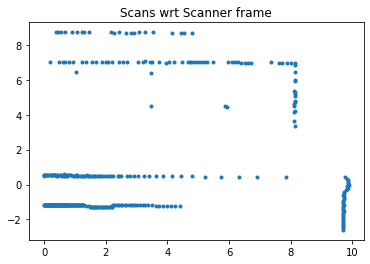

In [5]:
#a
#Plot all scans w.r.t. the scanner
x = np.cos(angle) * scan
y = np.sin(angle) * scan

#Create the figure
fig_01 = plt.figure()
ax_01 = fig_01.add_subplot(1,1,1)
ax_01.plot(x,y,'.')
ax_01.set_title("Scans wrt Scanner frame")

1 0.5
[[1.14142136]
 [0.64142136]
 [1.        ]]


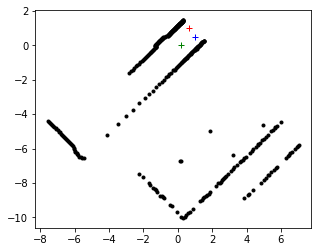

In [6]:
#c
#Plot all the scans w.r.t. global
#Calculate the position of the scans wrt Global
#Calculate the Transformation matrix g_T_r:     robot2global
g_T_r = np.array([[np.cos(g_theta),    -np.sin(g_theta),    g_x],
                  [np.sin(g_theta),     np.cos(g_theta),    g_y],
                  [0,                   0,                  1  ]])


#Calculate the Transformation matrix r_T_s:     scanner2robot
r_T_s = np.array([[np.cos(r_theta),    -np.sin(r_theta),    r_x],
                  [np.sin(r_theta),     np.cos(r_theta),    r_y],
                  [0,                   0,                  1  ]])

#Get the number of scans
num = len(scan)
s_xy = np.zeros((3,num))
s_xy[2,:] = 1
# print(s_xy)

#Calculate the karthesian coordinates of the scans wrt the laser scanner
#s_x = np.cos(ang) * range  -> first row
#s_y = np.sin(ang) * range  -> second row
for i in range(num):
    s_xy[0,i] = scan[i] * np.cos(angle[i])
    s_xy[1,i] = scan[i] * np.sin(angle[i])


#Create a table for the coordinates in the global frame
#g_p = g_T_r * r_T_s * s_p
g_xy = np.zeros((3,num))
g_xy[2,:] = 1

for i in range(num):
    #Read out the current point wrt Laser scanner
    s_p = s_xy[:,i].reshape((3,1))
    g_p = g_T_r.dot(r_T_s.dot(s_p))
    #Write g_p into global point list
    g_xy[0,i] = g_p[0,0]
    g_xy[1,i] = g_p[1,0]
    g_xy[2,i] = g_p[2,0]
    # print(g_p[2,0])

#Calculate the Center of the scanner in global
s_p = np.array([[r_x],
                [r_y],
                [1]])

g_psc = g_T_r.dot(s_p)

#Create the figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')

ax.plot(g_xy[0,:],g_xy[1,:],'k.')
ax.plot(g_x,g_y,'b+')
ax.plot(g_psc[1],g_psc[2],'r+')
ax.plot(r_T_s[0,2],r_T_s[0,1],'g+')

print(g_x,g_y)
print(g_psc)


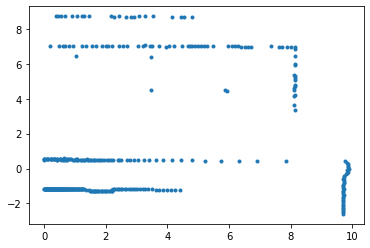

In [117]:
x = scan * np.cos(angle)
y = scan * np.sin(angle)

plt.plot(x,y,'.')